# DSC 550 Data Mining
  
## Wyatt Rasmussen
## Final Project 

**Topic:**  
    My topic for this project is diamonds. A dataset I found at https://www.kaggle.com/shivam2503/diamonds?select=diamonds.csv, contains over 50,000 different diamonds with 10 variables and an index. Those variables are:  
1. carat
    * unit of mass equal to 200 mg
2. cut  
    * cut quality of the diamond. fair, good, very good, premium, ideal
3. color  
    * quality of the cut. the worst being J to the best being D
4. clarity  
    * how clear a diamond is. range of I1 being worst to IF being best
5. depth  
    * depth percentage. height of diamond divided by its average girdle diameter
6. table  
    * width of the top of the diamond relative to its widest point
7. price  
    * how much is the diamond
8. length in mm  
    * length of the diamond. variable 'x'
9. width in mm  
    * width of the diamond. variable 'y'
10. depth in mm  
    * depth of the diamond. variable 'z'
  
With all of this information I would like to build a model that can attempt to give a pricing estimation based on the features of the diamond. I would need to determine which features are most important for the pricing of the diamonds and how combinations of different features can cause diamonds to be more or less expensive than other diamonds. I think the combination of numerical and categorical data helps to make this dataset well rounded, while not being overloaded with data.  
  
By creating this model, the business problem I am trying to solve for is determining what the cost of a diamond should be dependent on the features of the diamonds. This would be a big help to diamond shops that need information to help them price diamonds and could also help them understand which prices are good to buy the diamonds for resell. 

## Exploratory Data Analysis

### Importing the data  
Looking at the data to ensure we don't have null values and getting a feel for how our data is formatted

In [1]:
# imports

import pandas as pd
import numpy as np
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the diamond.csv into a df

diamonds = pd.read_csv('diamonds.csv')

In [3]:
# previewing the diamonds df

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
shape = diamonds.shape

print('The shape of the diamonds dataframe is:', shape)

The shape of the diamonds dataframe is: (53940, 11)


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
# drop the Unnamed column. Use the index instead

diamonds.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


x, y, and z have minimum values of 0 which is impossible. This must mean that we have missing data that we need to remove from the dataset.

In [10]:
print("Number of rows with x == 0: ", (diamonds.x==0).sum())
print("Number of rows with y == 0: ", (diamonds.y==0).sum())
print("Number of rows with z == 0: ", (diamonds.z==0).sum())

Number of rows with x == 0:  8
Number of rows with y == 0:  7
Number of rows with z == 0:  20


In [11]:
diamonds[['x', 'y', 'z']] = diamonds[['x', 'y', 'z']].replace(0, np.NaN)

In [12]:
diamonds.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [13]:
diamonds.dropna(inplace=True)

In [14]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
# getting the shape after removing the values that were zero

new_shape = diamonds.shape

new_shape

(53920, 10)

**Summary**  
  
The data set that I am working with has almost 54,000 data points across 10 different features. There was a little bit of null data in the x, y, and z columns. With such a large set of data I can remove the data. All of our features are numerical features, except for Cut, Color, and Clarity.

### Graphics Analysis

**Bar Chart**
  
Setting up a bar chart to look at how the categorical variables are laid out.

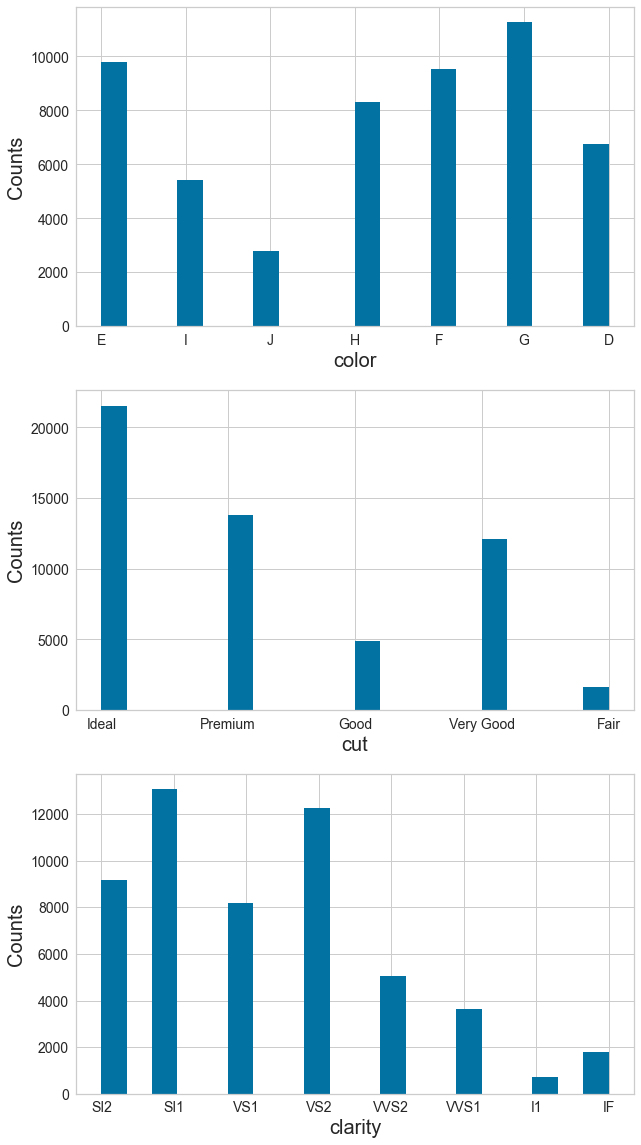

In [16]:
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 20)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1)

# Specify the features of interest
cat_features = ['color', 'cut', 'clarity']
xaxes = cat_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(diamonds[cat_features[idx]].dropna(), bins=20)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
plt.show()

**Pearson Ranking**
  
Using Pearson Ranking to visualize the correlation between the numerical variables in the data set

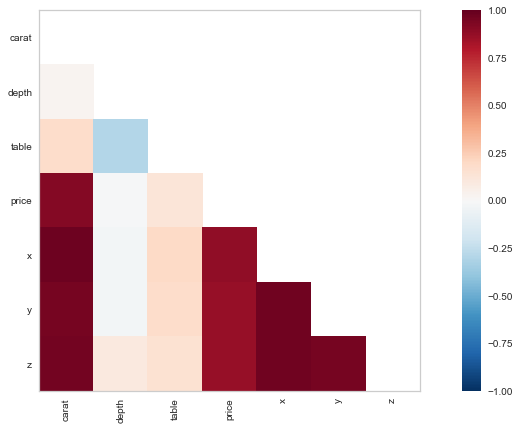

In [17]:
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
num_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
X = diamonds[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()

**Scatter Plots**
  
Creating a series of scatter plots to visualize the relationship between the data

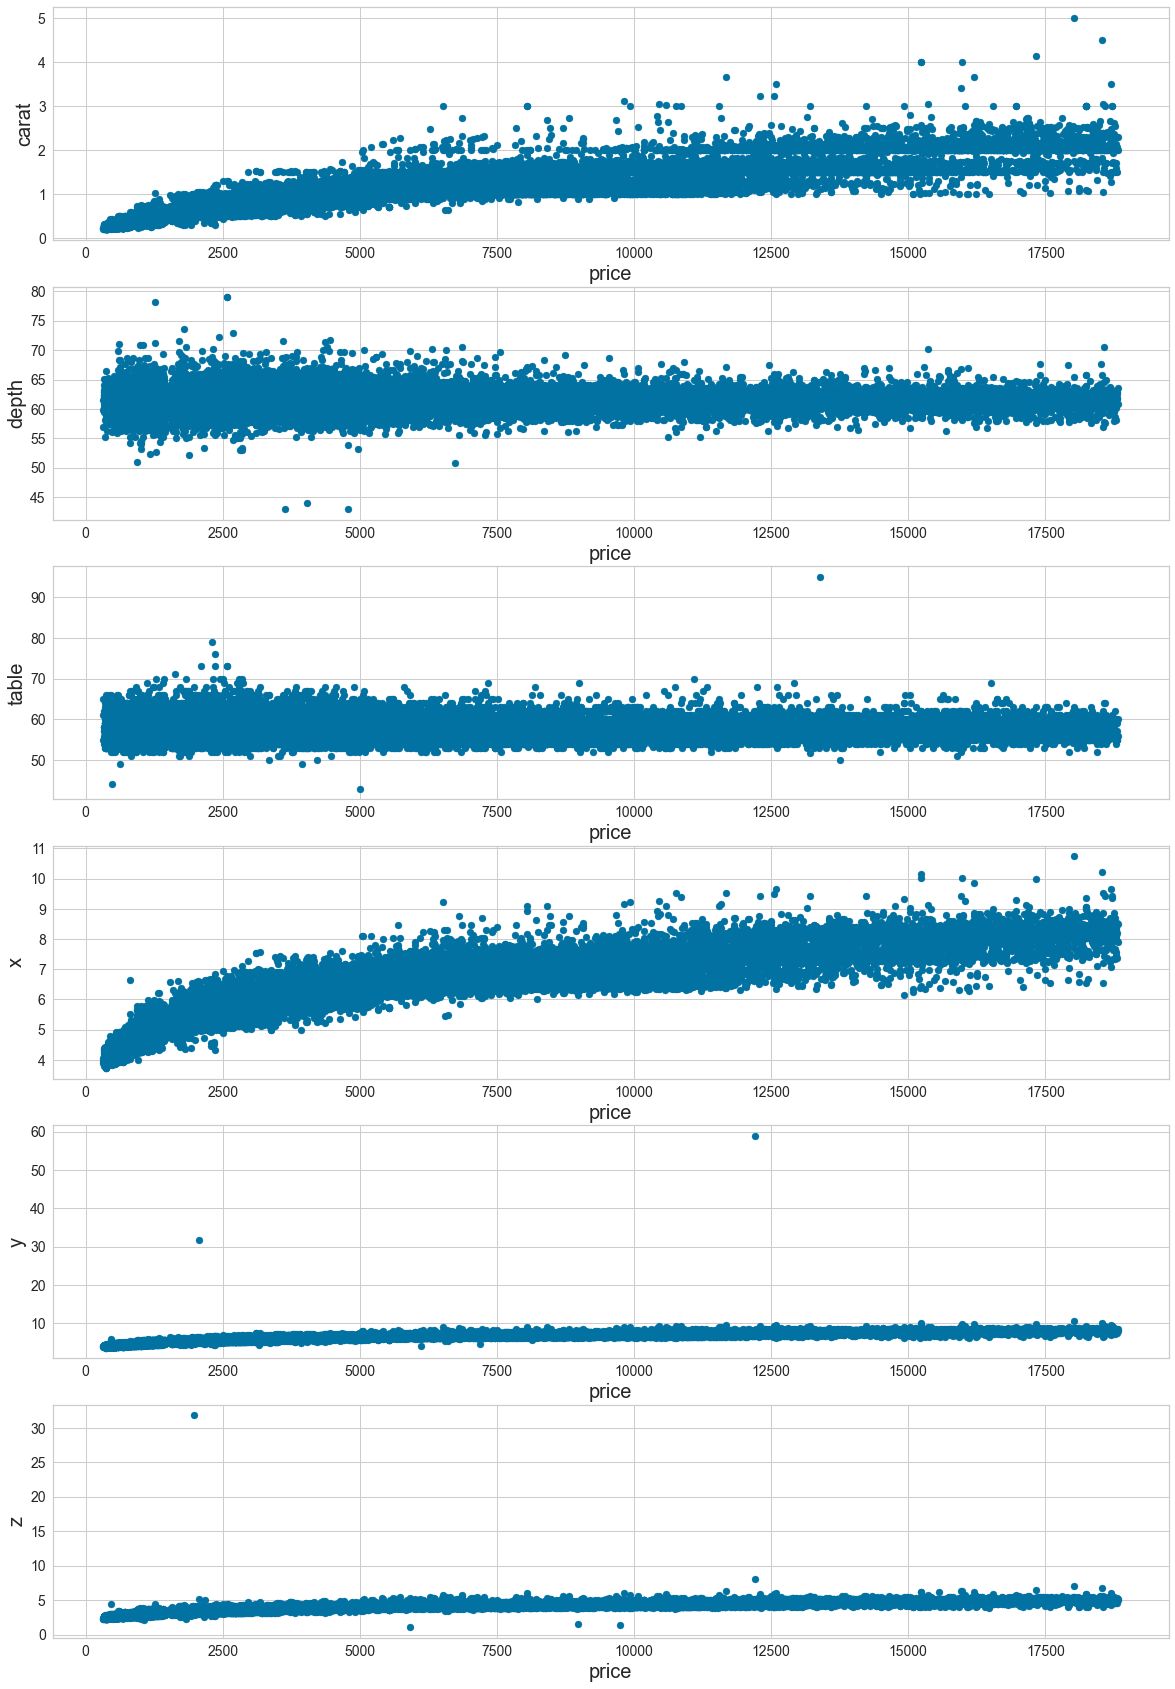

In [68]:
plt.rcParams['figure.figsize'] = (20, 30)

# make subplots
fig, axes = plt.subplots(nrows = 6, ncols = 1)

num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
price_list = ['price', 'price', 'price', 'price', 'price', 'price']
xaxes = price_list
yaxes = num_features

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.scatter(diamonds[price_list[idx]], diamonds[num_features[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
plt.show()

**Box Plots**
  
Box plots are another way for me to visualize the relationships in the data and check for outliers

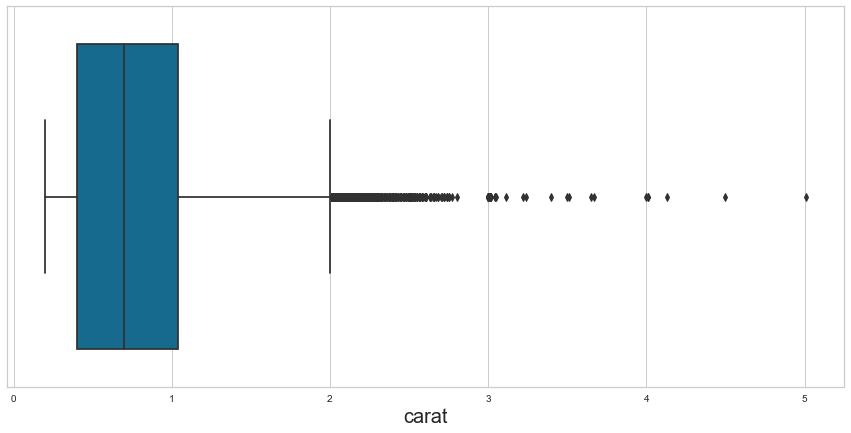

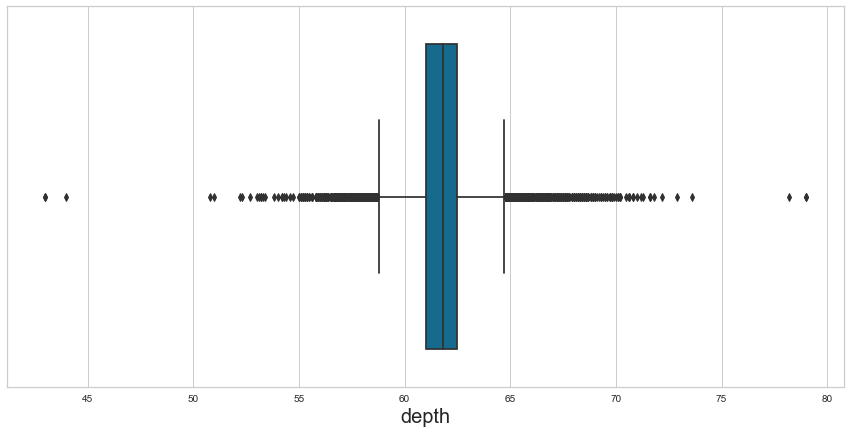

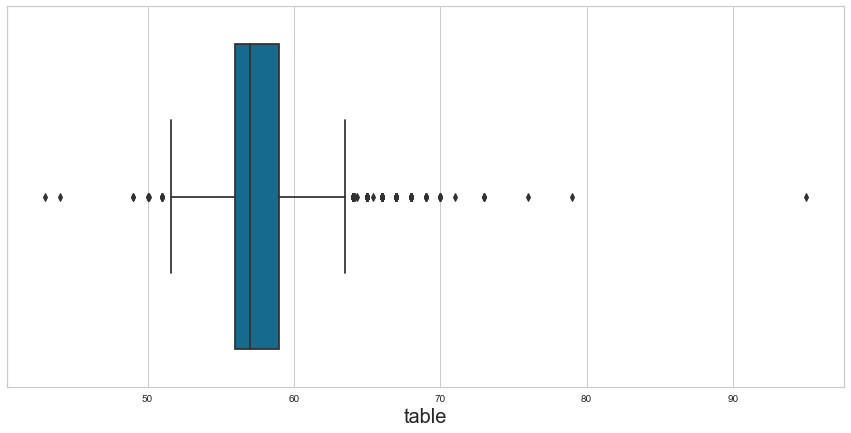

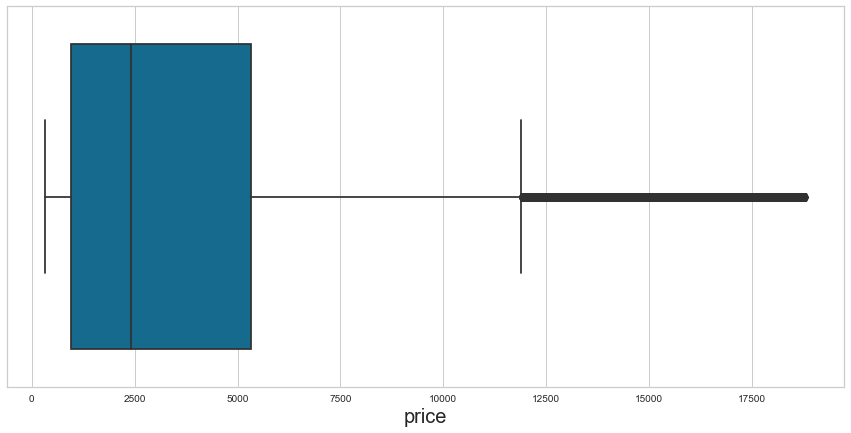

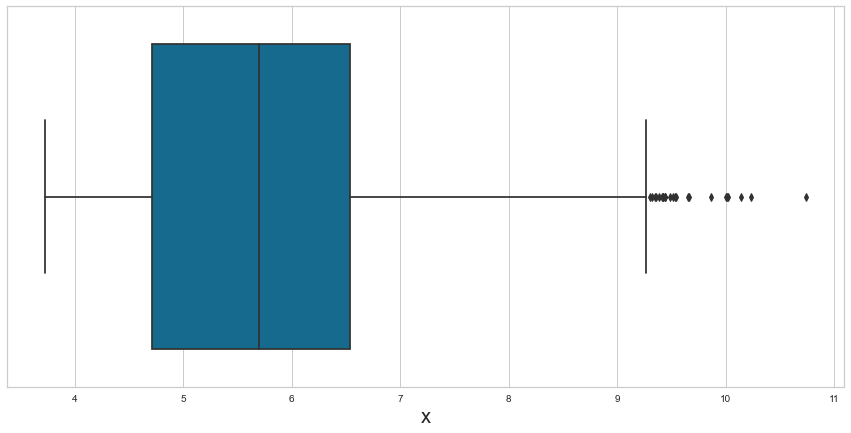

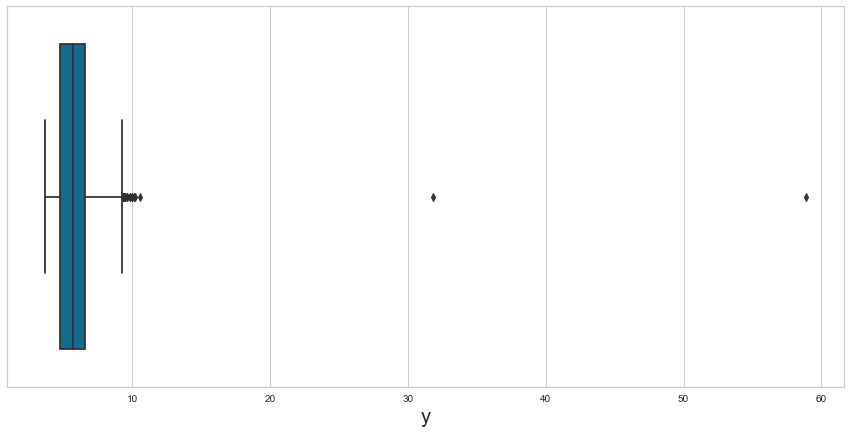

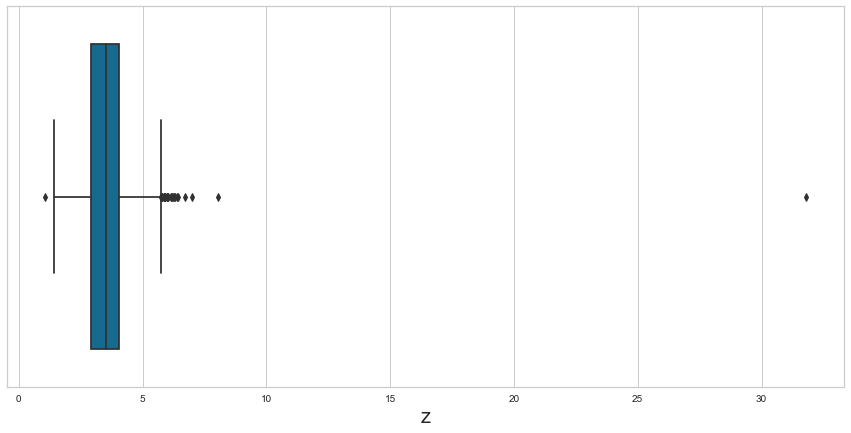

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)

# features of interest
num_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for idx, ax in enumerate(num_features):
    p = sns.boxplot(x=diamonds[num_features[idx]])
    p.set_xlabel(num_features[idx], fontsize=20)
    plt.show()

## Feature Selection

As part of feature selection I decided that it would be smart to change the categorical variables into numbers that would enable me to be able to work with them a little easier. Numbers will help me create correlation between the that and the price.

In [20]:
# getting the dtypes of all variables

diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Cut, Color, and Clarity are categorical data, in order to turn them into numerical data I must separate them out and assign numbers to each of the categories associated to each one.

In [21]:
# separating out the cut, color, and clarity

object_df = diamonds.select_dtypes(include=['object']).copy()
object_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [22]:
# getting all values for cut, color, and clarity

cut_values = object_df['cut'].value_counts()
color_values = object_df['color'].value_counts()
clarity_values = object_df['clarity'].value_counts()

print('The cut values are:\n', cut_values)
print('\n')
print('The color values are:\n', color_values)
print('\n')
print('The clarity values are:\n', clarity_values)

The cut values are:
 Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64


The color values are:
 G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64


The clarity values are:
 SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


In [23]:
# convert the categories to number increasing in order from worst (1) to best

cleanup_nums = {
                "cut":     {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5},
                "color":   {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7},
                "clarity": {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
               }

In [24]:
# attaching the cleanup_nums to the diamonds df

diamonds = diamonds.replace(cleanup_nums)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Lasso Regression

Lasso Regression can be used in feature regression to see what features have the biggest effect on the regresion of the model. This can help limit the features and select the ones most important for a model.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
# selecting the features I would like to test again the price

features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

X = diamonds[features]
Y = diamonds['price']

In [27]:
# splitting the data into  train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

In [28]:
# setting up a lasso regression for regularization for feature selection with alpha = 1

lasso = Lasso()
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

/Users/wrasmussen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357272556.0124283, tolerance: 26015335.733980212
  positive)


In [29]:
print('Training score: ', train_score)
print('Test score: ', test_score)

Training score:  0.9067836444063968
Test score:  0.9062535146289787


In [30]:
# setting up a lasso regression for regularization for feature selection with alpha = 0.01

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train, y_train)

train_score001 = lasso001.score(X_train, y_train)
test_score001 = lasso001.score(X_test, y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [31]:
print('Training score for alpha = 0.01: ', train_score001)
print('Test score for alpha = 0.01: ', test_score001)

Training score for alpha = 0.01:  0.9068219329547539
Test score for alpha = 0.01:  0.9041696968284519


In [32]:
# setting up a lasso regression for regularization for feature selection with alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [33]:
print('Training score for alpha = 0.0001: ', train_score00001)
print('Test score for alpha = 0.0001: ', test_score00001)

Training score for alpha = 0.0001:  0.9068219370975329
Test score for alpha = 0.0001:  0.904141743104286


In [34]:
# setting up a linear regression for regularization for feature selection

lr = LinearRegression()

lr.fit(X_train,y_train)

lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [35]:
print("Linear Regression training score: ", lr_train_score)
print("Linear Regression test score: ", lr_test_score)

Linear Regression training score:  0.9068219370979473
Linear Regression test score:  0.9041414600774225


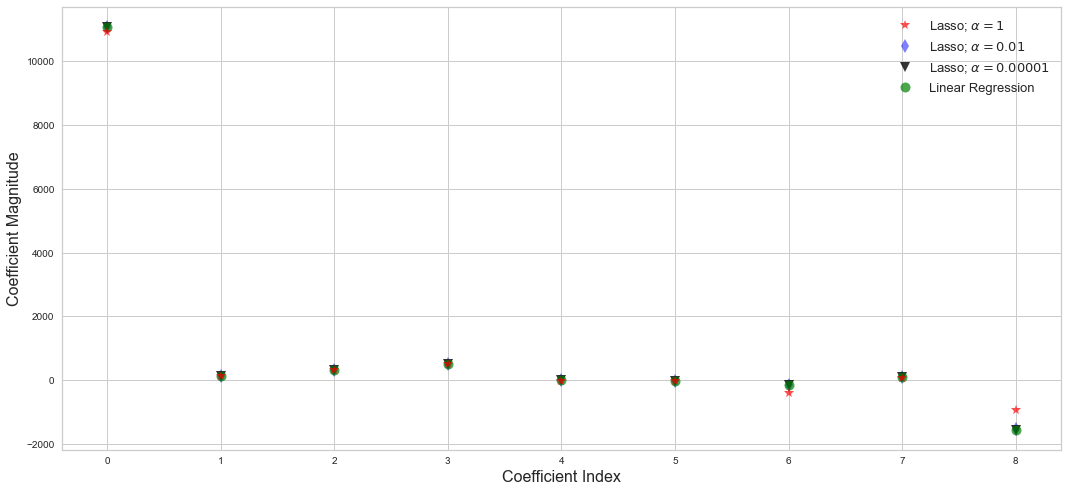

In [36]:
# plotting the lasso regression helps us pick features by finding the features with nonzero coefficient magnitude

plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='*', markersize=10, color='red', 
         label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lasso001.coef_, alpha=0.5, linestyle='none', marker='d', markersize=10, color='blue', 
         label=r'Lasso; $\alpha = 0.01$') 
plt.plot(lasso00001.coef_, alpha=0.8, linestyle='none', marker='v', markersize=10, color='black', 
         label=r'Lasso; $\alpha = 0.00001$') 
plt.plot(lr.coef_, alpha=0.7, linestyle='none', marker='o', markersize=10, color='green', 
         label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.tight_layout()
plt.show()

**Lasso Regression Conclusion**
  
Based on the Lasso Regression it appears that we have a we can select a few features that are non zero. Carat, cut,  color, clarity, x, and z seem to be the features that are non zero. These would be the features that Lasso Regression would suggest selecting.

### Correlation Heatmap

Creating a correlation heatmap with the variables that the Lasso Regression gave us to help see the correlation of the features

In [37]:
selected_features = ['price', 'carat', 'cut', 'color', 'clarity', 'x', 'z']

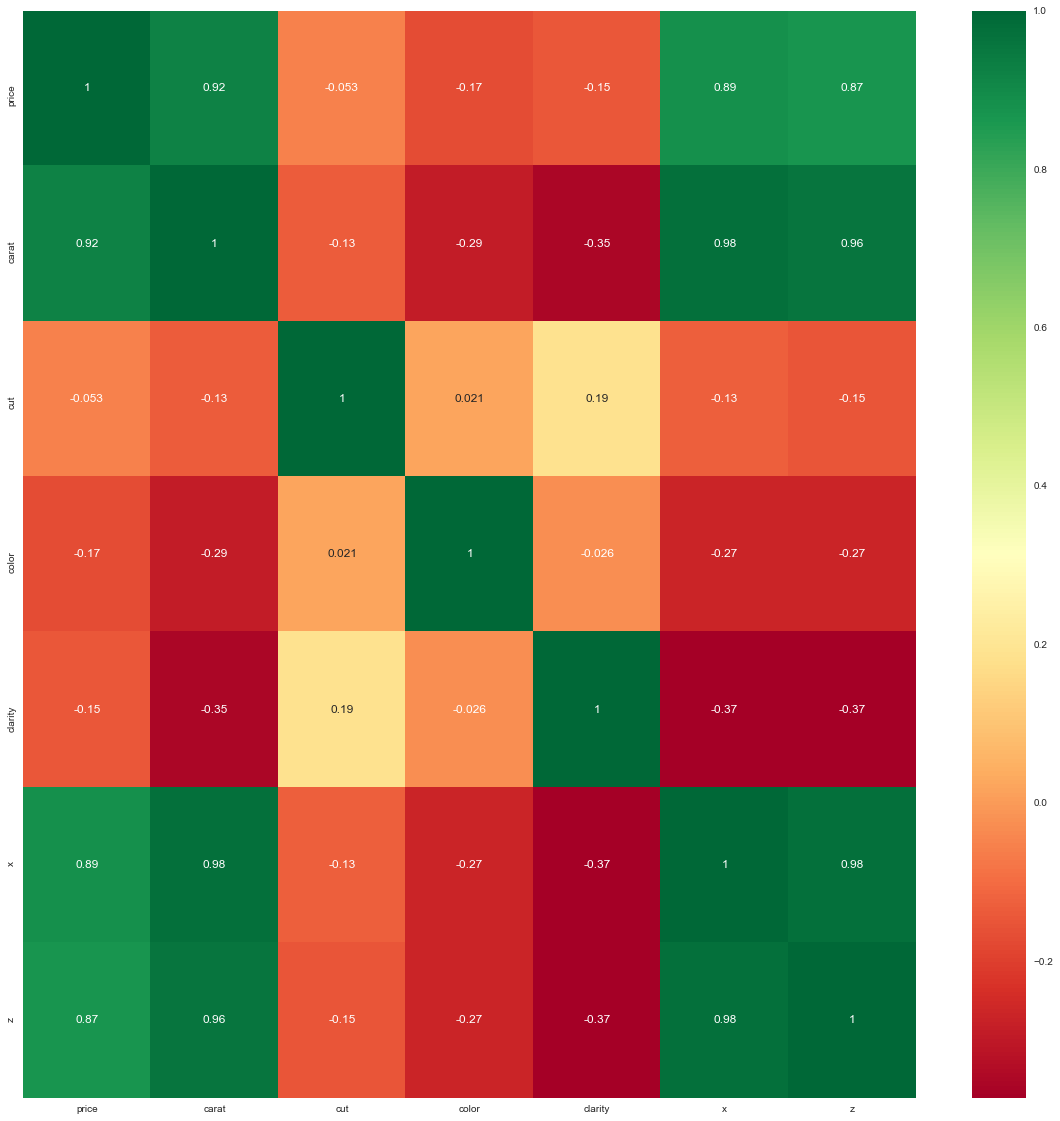

In [38]:
corrmat = diamonds[selected_features].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(diamonds[top_corr_features].corr(), annot=True, cmap = 'RdYlGn')

## Model Evaluation

Since my data is primarily numerical, it only makes sense to look into different regression models and building these in order actually make a price prediction. Based on the scores I get from the regression models I can then determine which is the best for my data.  
  
In the feature selection portion of my project I have determined that the features that were most critical to building a model was **Carat**, **Cut**, **Color**, **Clarity**, **X** and **Z**. These will be the features that I use in model evaluation going forward.

### Ridge Regression

In [39]:
# from numpy import mean
# from numpy import std
# from numpy import absolute
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [40]:
# selected features based on the feature selection performed above

selected_features = ['carat', 'cut', 'color', 'clarity', 'x', 'z']

In [41]:
X = diamonds[selected_features]
Y = diamonds['price']

In [42]:
# using train_test_split to get our data into training and testing groups

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [43]:
model = Ridge()

In [44]:
parameters = {'alpha':[0.01, 0.10, 1, 5, 10, 20, 25, 30, 35]}

In [45]:
ridge_reg = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

In [46]:
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 25, 30, 35]},
             scoring='neg_mean_squared_error')

In [47]:
print(ridge_reg.best_estimator_)

Ridge(alpha=20)


In [48]:
rr = Ridge()

In [49]:
# setting up the ridge regession

rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train, y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [50]:
print('Ridge Regresison Training Score: ', Ridge_train_score)
print('Ridge Regresison Test Score: ', Ridge_test_score)

Ridge Regresison Training Score:  0.9063765529268059
Ridge Regresison Test Score:  0.9078307387259955


In [51]:
# trying a ridge regression with a high alpha score

rr20 = Ridge(alpha=20)

rr20.fit(X_train, y_train)

Ridge_train_score20 = rr20.score(X_train, y_train)
Ridge_test_score20 = rr20.score(X_test, y_test)

In [52]:
print('Ridge Regresison Training Score with alpha = 20: ', Ridge_train_score20)
print('Ridge Regresison Test Score with alpha = 20: ', Ridge_test_score20)

Ridge Regresison Training Score with alpha = 20:  0.9062222949090917
Ridge Regresison Test Score with alpha = 20:  0.9075536429861389


**Ridge Regression Conclusion**
  
It seems that the alpha score has a small impact on our scores. It seems as though the alpha being a lower number actually gives us a slighly better regression fit.

### Linear Regression

In [53]:
# setting up a linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

In [54]:
print('Linear Regresison Training Score: ', lr_train_score)
print('Linear Regresison Test Score: ', lr_test_score)

Linear Regresison Training Score:  0.9063769814528755
Linear Regresison Test Score:  0.9078382378101414


### Lasso Regression

In [55]:
model = Lasso()

In [56]:
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.10, 1, 5, 10]}

In [57]:
lasso_reg = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

In [58]:
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [59]:
print(lasso_reg.best_estimator_)

Lasso(alpha=5)


In [60]:
# setting up a lasso regression to fit our data

lasso = Lasso()
lasso.fit(X_train, y_train)

lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

In [61]:
print('Lasso Regresison Training Score: ', lasso_train_score)
print('Lasso Regresison Test Score: ', lasso_test_score)

Lasso Regresison Training Score:  0.9063627559667576
Lasso Regresison Test Score:  0.9077798501553653


In [62]:
# setting up a lasso regression with a very small alpha

lasso5 = Lasso(alpha=5)
lasso5.fit(X_train, y_train)

lasso_train_score5 = lasso5.score(X_train, y_train)
lasso_test_score5 = lasso5.score(X_test, y_test)

In [63]:
print('Lasso Regresison Training Score Alpha = 5: ', lasso_train_score5)
print('Lasso Regresison Test Score Alpha = 5: ', lasso_test_score5)

Lasso Regresison Training Score Alpha = 5:  0.9060086563076835
Lasso Regresison Test Score Alpha = 5:  0.9072741487986498


### Comparing Different Regressions

In [64]:
print('\033[1m Ridge Regression Alpha = 0.01 \033[0m')
print('Ridge Regresison Training Score: ', Ridge_train_score)
print('Ridge Regresison Test Score: ', Ridge_test_score)
print('\n')
print('\033[1m Ridge Regression Alpha = 20 \033[0m')
print('Ridge Regresison Training Score: ', Ridge_train_score20)
print('Ridge Regresison Test Score: ', Ridge_test_score20)
print('\n')
print('\033[1m Linear Regression \033[0m')
print('Linear Regresison Training Score: ', lr_train_score)
print('Linear Regresison Test Score: ', lr_test_score)
print('\n')
print('\033[1m Lasso Regression \033[0m')
print('Lasso Regresison Training Score: ', lasso_train_score)
print('Lasso Regresison Test Score: ', lasso_test_score)
print('\n')
print('\033[1m Lasso Regression Alpha = 5 \033[0m')
print('Lasso Regresison Training Score: ', lasso_train_score5)
print('Lasso Regresison Test Score: ', lasso_test_score5)

 Ridge Regression Alpha = 0.01 
Ridge Regresison Training Score:  0.9063765529268059
Ridge Regresison Test Score:  0.9078307387259955


 Ridge Regression Alpha = 20 
Ridge Regresison Training Score:  0.9062222949090917
Ridge Regresison Test Score:  0.9075536429861389


 Linear Regression 
Linear Regresison Training Score:  0.9063769814528755
Linear Regresison Test Score:  0.9078382378101414


 Lasso Regression 
Lasso Regresison Training Score:  0.9063627559667576
Lasso Regresison Test Score:  0.9077798501553653


 Lasso Regression Alpha = 5 
Lasso Regresison Training Score:  0.9060086563076835
Lasso Regresison Test Score:  0.9072741487986498
